# Multiple Linear Regression

### Predicting C02 Emissions with more independent variables

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
!curl -O https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0  12500      0  0:00:05  0:00:05 --:--:-- 17442


In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


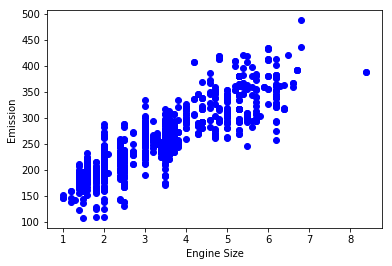

In [10]:
#to check whether linear regression good for making predictions on this data
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

## Create a Training and Testing Dataset
#### I'll be using 80% of the data for Training and the rest for testing. It will be mutually exclusive.

In [30]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test =cdf[~msk]


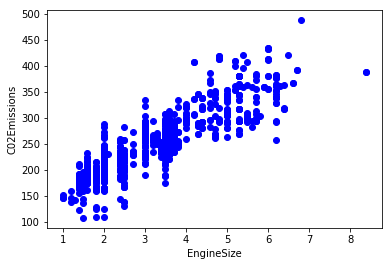

In [31]:
# Train Data Distribution

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
plt.xlabel('EngineSize')
plt.ylabel('C02Emissions')
plt.show()


### Multiple Regression Model

##### We will be using Fuel Consumption, Cylinders and Engine size to predict the CO2 Emissions.

In [32]:
from sklearn import linear_model as lm
regr= lm.LinearRegression()
x= np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#THE COEFFICIENTS
print('Coefficients :', regr.coef_)

Coefficients : [[9.87449527 8.24663311 9.72974801]]


#### Prediction

In [37]:
from sklearn.metrics import r2_score
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x_test= np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])
#rse
print('RSE : %.2f' % np.mean((y_hat - y_test)**2))
#variance score : 1 is perfect
print('Variance Score: %.2f' %regr.score(x_test,y_test))
#R^2 Score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

RSE : 506.05
Variance Score: 0.87
R2-score: 0.86


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

#### With Independent Variables as Fuel Consumption on Highway and in City.

In [42]:
from sklearn import linear_model as lm
regr= lm.LinearRegression()
x= np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#THE COEFFICIENTS
print('Coefficients :', regr.coef_)

y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
x_test= np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])
#rse
print('RSE : %.2f' % np.mean((y_hat - y_test)**2))
#variance score : 1 is perfect
print('Variance Score: %.2f' %regr.score(x_test,y_test))

Coefficients : [[9.93773423 7.91788228 3.2285551  6.21739176]]
RSE : 503.93
Variance Score: 0.87
